- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

In [1]:
using FileIO, GLMakie, GeometryBasics, LinearAlgebra
using AbstractPlotting: get_dim, surface_normals

### Download this file

https://matplotlib.org/matplotblog/posts/custom-3d-engine/bunny.obj

In [2]:
bunny = load("bunny.obj")

ptstemp = bunny.position
npts = length(ptstemp)
points = zeros(npts, 3)
for i in 1:npts
    points[i,:] = ptstemp[i]
end
# normalize into a box and/or translations
mnpts = minimum(points, dims=1)
mxpts = maximum(points, dims=1)
for (i, ele) in enumerate(bunny.position)
    newele = (ele .- ((mxpts .+ mnpts)./2)')/maximum(mxpts .- mnpts)
    bunny.position[i] =  newele .+ [0,1,0]
end

https://discourse.julialang.org/t/makie-3d-mesh-plot-is-not-as-good-as-before/39808

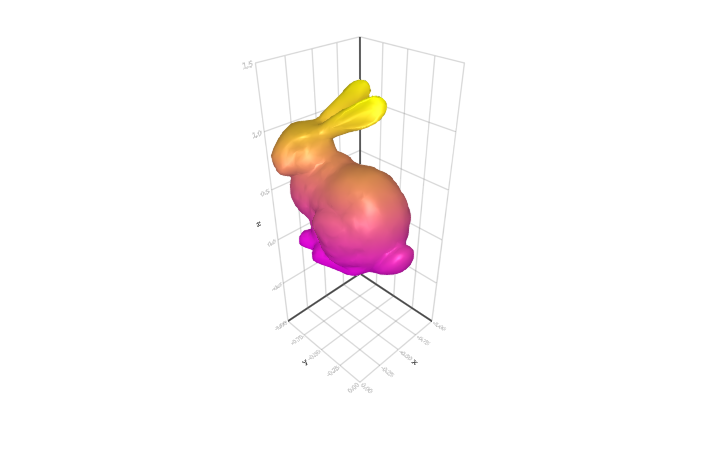

In [3]:
fig, ax, pltobj = mesh(normal_mesh(bunny), color= [v[2] for v in coordinates(bunny)],
    colormap = :spring, shading = true, limits = FRect((-1,-1,-1), (1,1,2.5)))
rabbit =  ax.scene[end]
GLMakie.rotate!(rabbit, Quaternionf0(0.5, 0.5, 0.5, 0.5))
fig

https://github.com/JuliaPlots/WGLMakie.jl/blob/master/src/imagelike.jl#L67

In [4]:
function getMesh(x,y,z)
    positions = vec(map(CartesianIndices(z)) do i
    GeometryBasics.Point{3, Float32}(
        get_dim(x, i, 1, size(z)),
        get_dim(y, i, 2, size(z)),
        z[i])
    end)
    faces = decompose(GLTriangleFace, Rect2D(0f0, 0f0, 1f0, 1f0), size(z))
    normals = surface_normals(x, y, z)
    vertices = GeometryBasics.meta(positions; normals=normals) 
    meshObj = GeometryBasics.Mesh(vertices, faces)
    meshObj 
end

getMesh (generic function with 1 method)

# The egg

In [5]:
Θ = LinRange(0, 2π, 100) # 50
Φ = LinRange(0, π, 100)
r = 0.5
x = [r * cos(θ) * sin(ϕ) for θ in Θ, ϕ in Φ]
y = [r * sin(θ) * sin(ϕ) for θ in Θ, ϕ in Φ]
z = [r * cos(ϕ) for θ in Θ, ϕ in Φ]
Z = z .* exp.(0.6*z).+ z/3;

In [6]:
meshSphere = getMesh(x,y, Z);

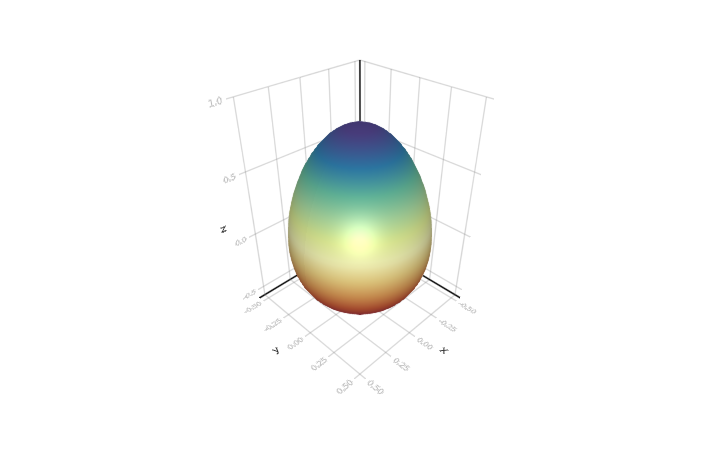

In [7]:
mesh(meshSphere, color= [v[3] for v in coordinates(meshSphere)], # color = z, # v[3]
    colormap = :Spectral_11, shading = true)

## All together

In [8]:
α = Node(-0.05)
β = Node(0)
γ = Node(0)
αβγ = @lift(($α, $β, $γ))

Observable{Tuple{Float64, Int64, Int64}} with 0 listeners. Value:
(-0.05, 0, 0)

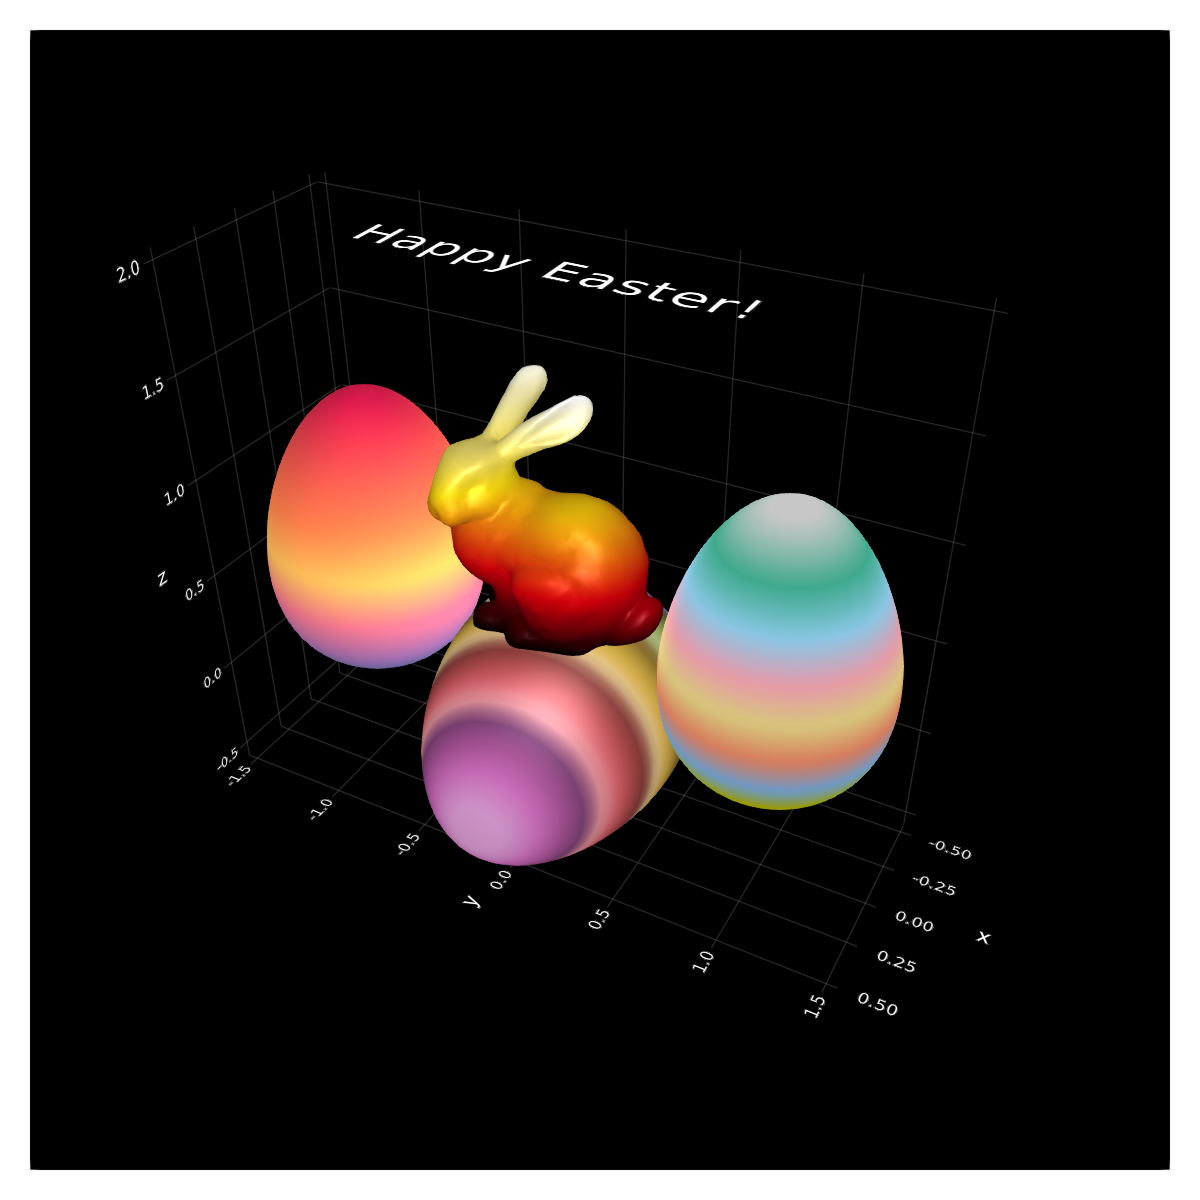

In [9]:
fig = Figure(resolution = (1200, 1200))
ax = LScene(fig, scenekw = (camera = cam3d!, show_axis = true))
sphere = mesh!(ax, meshSphere, color= [v[3] for v in coordinates(meshSphere)], # color = z, # v[3]
    colormap = :tab20b, shading = true, 
    ambient = Vec3f0(0.6, 0.6, 0.6), backgroundcolor = :black) # limits = FRect((-1,-1,-1), (3,3,2))


eggM =  ax.scene[end]
GLMakie.rotate!(eggM, Quaternionf0(0.5, 0.5, 0.6, 0.5))

mesh!(ax,  getMesh(x,y .+1, Z .+ 0.5), color= [v[3] for v in coordinates(meshSphere)], # color = z, # v[3]
    colormap = :tol_light, shading = true,
    lightposition = Vec3f0(0, 0, 1.5), ambient = Vec3f0(0.9, 0.9, 0.9))

mesh!(ax,  getMesh(x,y .-1, Z .+ 0.5), color= [v[3] for v in coordinates(meshSphere)], # color = z, # v[3]
    colormap = :tableau_sunset_sunrise, shading = true, 
    lightposition = Vec3f0(0.2, -1, 1.5), ambient = Vec3f0(0.9, 0.9, 0.9))

mesh!(ax, normal_mesh(bunny), color= [v[2] for v in coordinates(bunny)],
    colormap = :flag_gi, shading = true, ambient = Vec3f0(0.6, 0.6, 0.6))

rabbit =  ax.scene[end]
GLMakie.rotate!(rabbit, Quaternionf0(0.5, 0.5, 0.5, 0.5))

axis = ax.scene[OldAxis]
axis[:names, :axisnames] = ("x", "y", "z")
tstyle = axis[:names] #  get the nested attributes and work directly with them

tstyle[:textsize] = 10
tstyle[:textcolor] = (:white, :white, :white)
tstyle[:font] = "helvetica"
tstyle[:gap] = 5
axis[:ticks][:textcolor] = :white
axis[:ticks][:textsize] = 7
text!("Happy Easter!", position = Point3f0(0, -1, 2),
    color = :white,
    rotation = π/2,
    #align = (:center, :center),
    textsize = 0.25,
    space = :data
)
rotate_cam!(ax.scene, (-0.3,-0.0,0))

fig[1, 1] = ax
#fig[1, 2] = cbar
#save("bunny.png", fig, px_per_unit = 2)
fig

 I don't like this way for rotations, please suggestions on how to improve it. 